# Object Detection using YOLO Libray

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Install Libraries for requirement file
#!pip3 install -r /content/drive/MyDrive/CodSoft/Object_Detection/requirements.txt

In [6]:
#install
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)


In [7]:
#load pre trained model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.4MB/s]



In [8]:
# train model
results = model.train(data='coco128.yaml', epochs=3)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.

In [9]:
#Evaluate model
results = model.val()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:34<00:00,  4.35s/it]
                   all        128        929      0.686      0.583      0.661      0.493
                person        128        254      0.771      0.701      0.774      0.546
               bicycle        128          6      0.602      0.269      0.324      0.256
                   car        128         46      0.935      0.217      0.298      0.181
            motorcycle        128          5      0.697        0.8      0.938      0.752
              airplane        128          6      0.664      0.833      0.915      0.716
                   bus        128         

In [10]:
#bus image
results = model('https://ultralytics.com/images/bus.jpg', save=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
100%|██████████| 476k/476k [00:00<00:00, 11.3MB/s]
Results saved to runs/detect/predict


In [11]:
#2 people, dog, and cat image
results = model('/content/drive/MyDrive/CodSoft/Object_Detection/catdog.jpg', save=True)

Results saved to runs/detect/predict


In [12]:
#display image
Image(filename='/content/runs/detect/predict/catdog.jpg', height=600)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
model('/content/drive/MyDrive/CodSoft/Object_Detection/catdog.jpg')

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[3.52500e+03, 3.82000e+02, 5.42300e+03, 2.78800e+03, 7.84010e-01, 1.50000e+01],
         [2.17000e+02, 7.71000e+02, 2.59700e+03, 3.71200e+03, 7.55639e-01, 1.60000e+01],
         [3.00000e+00, 3.39000e+02, 2.01400e+03, 3.70800e+03, 5.09815e-01, 0.00000e+00],
         [4.29000e+03, 1.47700e+03, 5.61600e+03, 3.70000e+03, 4.63947e-01, 0.00000e+00]])]

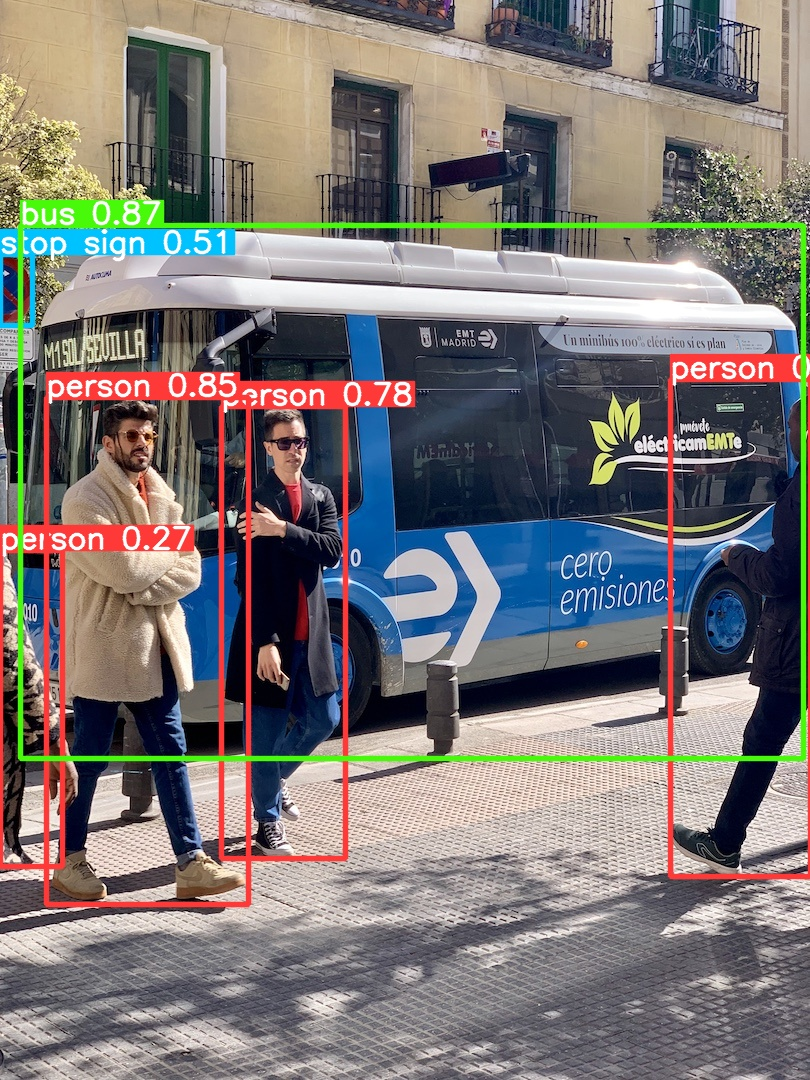

In [15]:
#show image
Image(filename='/content/runs/detect/predict/bus.jpg', height=600)

In [16]:
#bowl image
results = model('/content/drive/MyDrive/CodSoft/Object_Detection/bowl.jpg', save=True)

Results saved to runs/detect/predict


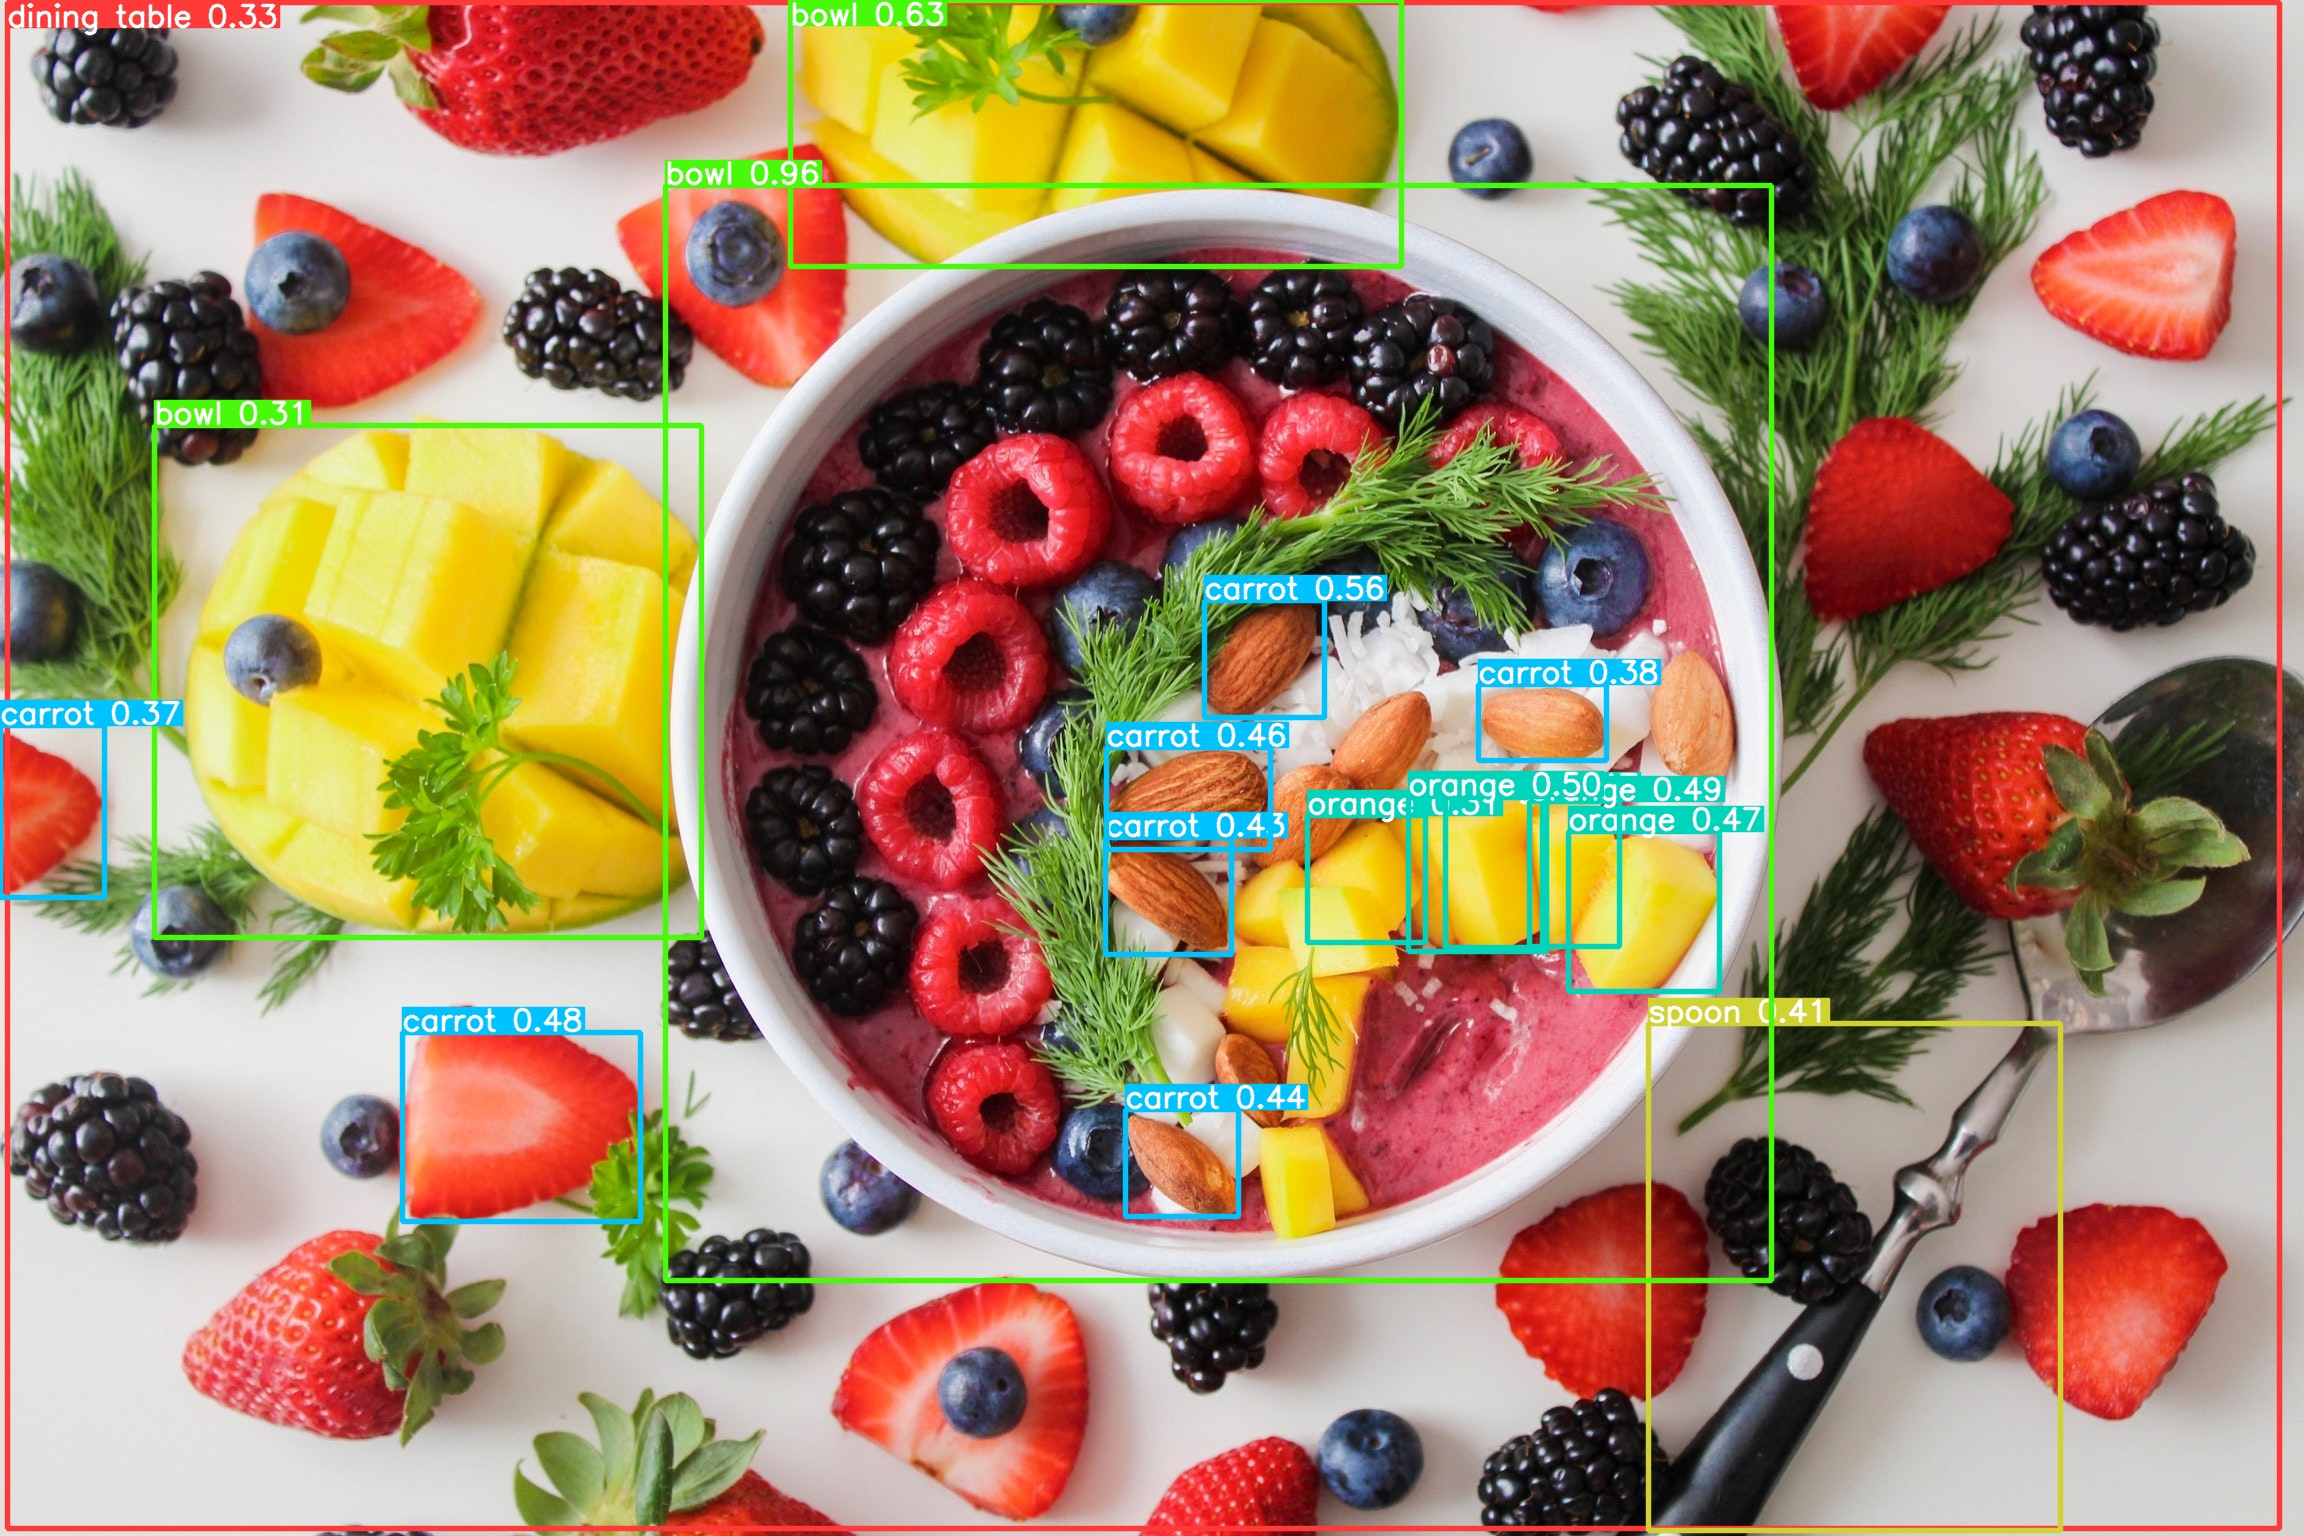

In [17]:
Image(filename='/content/runs/detect/predict/bowl.jpg', height=600)

For this image it is a little off. It is saying that the almonds are carrots.

In [19]:
#crowd image
results = model('/content/drive/MyDrive/CodSoft/Object_Detection/crowd.jpg', save=True)

Image(filename='/content/runs/detect/predict/crowd.jpg', height=600)

Output hidden; open in https://colab.research.google.com to view.

Yolo detects some people in the crowd but not all. It seems to work better when there is a limited amount of objects to detect. Yolo could add more classes of things if they wnted to improve for more complex computer vision.